#Ejemplo - Dataset Titanic

Features

    survival - Survival (0 = No; 1 = Yes)
    class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    name - Name
    sex - Sex
    age - Age
    sibsp - Number of Siblings/Spouses Aboard
    parch - Number of Parents/Children Aboard
    ticket - Ticket Number
    fare - Passenger Fare
    cabin - Cabin
    embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Exploración de los Datos


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 

# Descripción de Variables

**Ejemplo:** Crear un objeto DataFrame con base en un archivo .csv

In [ ]:
#titanic = pd.read_csv('titanic.csv')
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
titanic_df = pd.read_csv('/content/gdrive/MyDrive/datasets/titanic.csv')

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Cantidad de valores únicos de cada variable
titanic_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Exploración de Datos

In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


¿Tiene sentido obtener estas estadísticas para todas las variables? ¿En cuáles si?

In [ ]:
#Valores nulos
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Variables Cuantitativas

Variables cuantitativas: 

### Medidas estadísticas:
  Incluye medidas de tendencia central y medidas de dispersión.   
  La varianza y desviación típica, nos indica si los valores se desplazan mucho o poco con respecto de la media. La varianza es como se aleja cada valor de la media. La varianza eleva los valores al cuadrado… nos introduce en una nueva dimensión… La desviación típica es la raíz cuadrada de la varianza. Con la desviación típica volvemos a la dimensión original.


Ejercicio: Define un dataframe que sólo incluya las variables cuantitativas y muestra las medidas estadísticas

In [ ]:
#Edad
#Se puede obtener las medidas de tendencia central media, mediana y moda para una variable en particular.
mean_age = titanic_df['Age'].mean()
median_age =titanic_df['Age'].median()
mode_age = titanic_df['Age'].mode()
print("Mean_age:",mean_age)
print("Median_age:",median_age)
print("Mode_age:",mode_age)

Mean_age: 29.69911764705882
Median_age: 28.0
Mode_age: 0    24.0
Name: Age, dtype: float64


Conclusiones:
La edad promedio fue 29
La edad al centro es 28
La edad más repetida fue de 24

# Variables Categóricas

Variables categóricas:

In [ ]:
titanic_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Distribución de frecuencias

In [ ]:
titanic_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Análisis: 

In [ ]:
titanic_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Análisis:

In [ ]:
titanic_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
# Create a family size variable including the passenger themselves
titanic_df["FamilySize"] = titanic_df["SibSp"] + titanic_df["Parch"]+1
print(titanic_df["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


# Visualización de datos

## Variables Categóricas
Gráficas de barras, gráficas de pie

In [43]:
import matplotlib.pyplot as plt       ## wonderful library for data plotting
fig = plt.figure(figsize=(18,6))      ## To get a figure with proper structure

<Figure size 1800x600 with 0 Axes>

<Axes: >

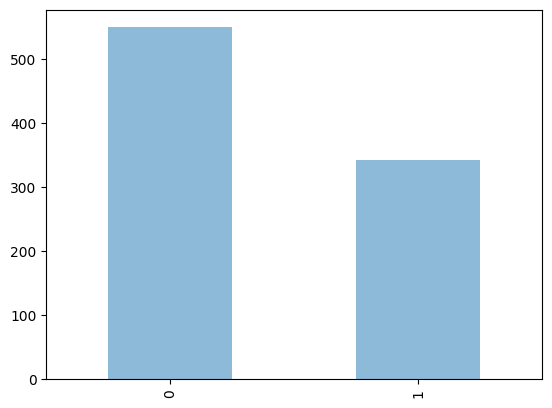

In [42]:
titanic_df.Survived.value_counts().plot(kind="bar",alpha=0.5)  

<Axes: >

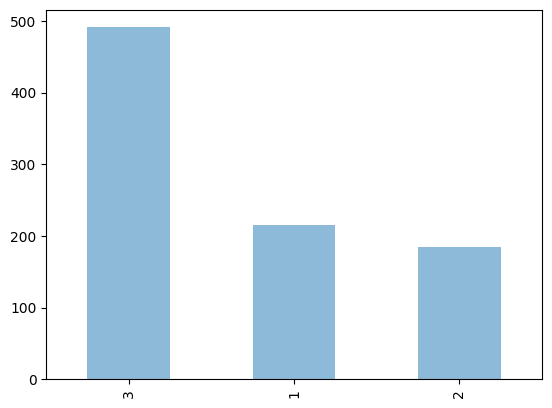

In [45]:
titanic_df.Pclass.value_counts().plot(kind="bar", alpha = 0.5)

<Axes: >

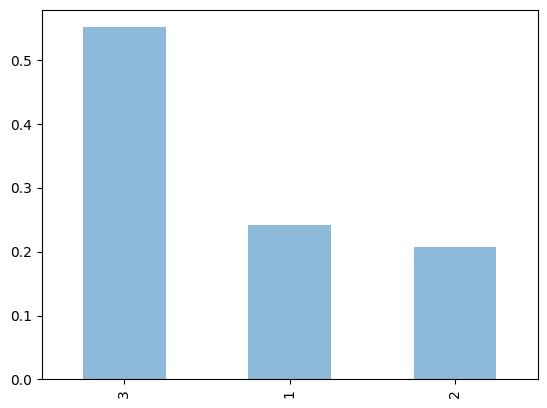

In [44]:
titanic_df.Pclass.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)

<Axes: >

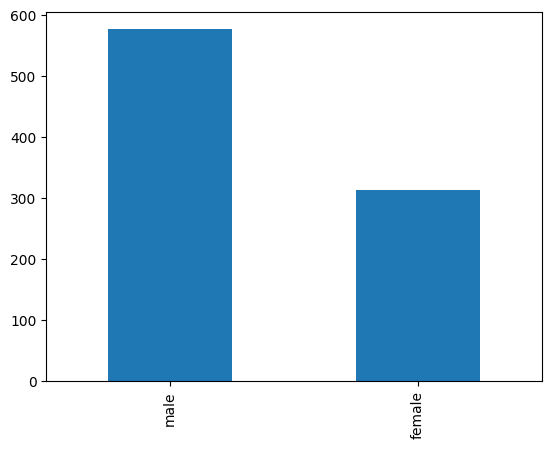

In [46]:
plotData=titanic_df.Sex.value_counts()
plotData.plot(kind='bar')

<Axes: ylabel='Sex'>

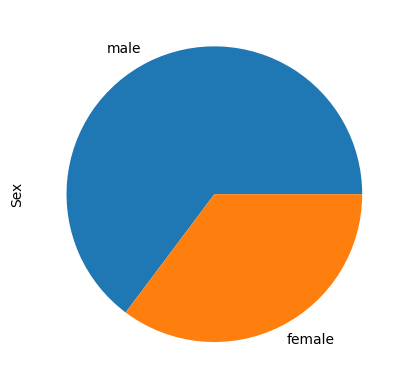

In [48]:
plotData.plot(kind='pie')

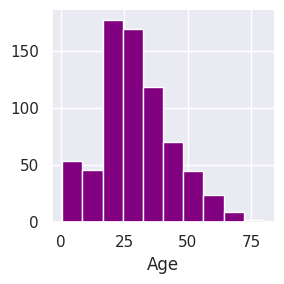

In [82]:
g = sns.FacetGrid(titanic_df, margin_titles=True)
g.map(plt.hist, "Age",color="purple");

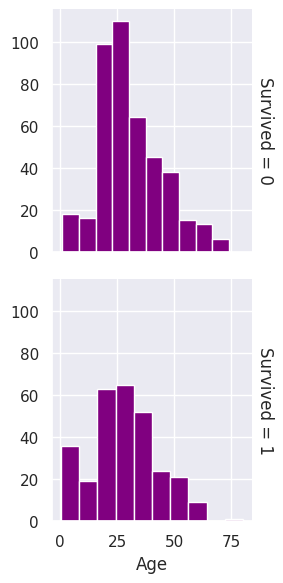

In [83]:
g = sns.FacetGrid(titanic_df, row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

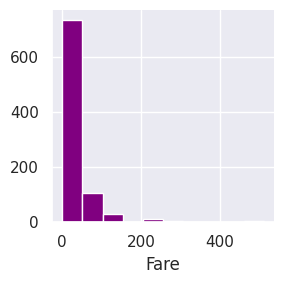

In [84]:
g = sns.FacetGrid(titanic_df, margin_titles=True)
g.map(plt.hist, "Fare",color="purple");

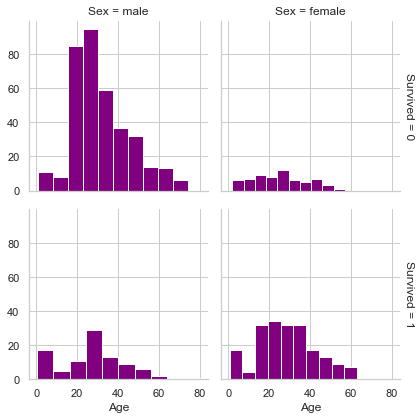

In [ ]:
g = sns.FacetGrid(titanic_df, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

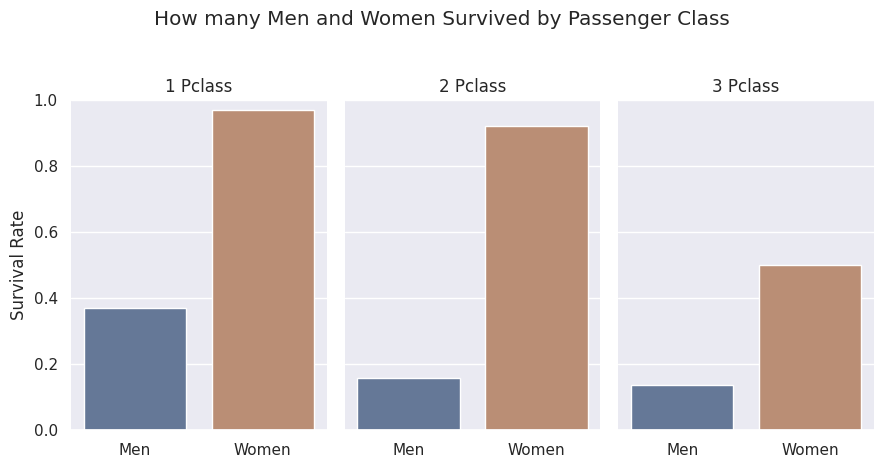

In [50]:
sns.set(font_scale=1)
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic_df, saturation=.5,
                    kind="bar", errorbar=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

## Variables Cuantitativas

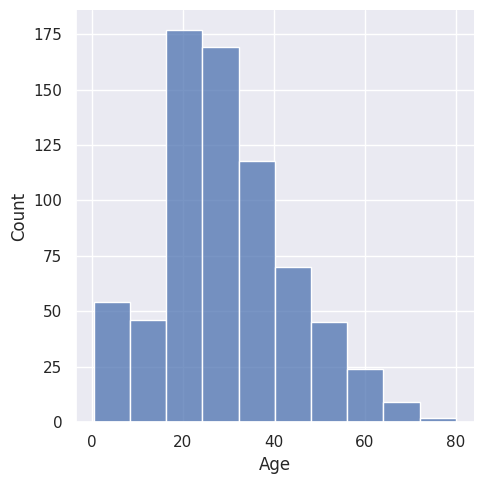

In [51]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.displot(titanic_df['Age'], bins=10)
plt.show()

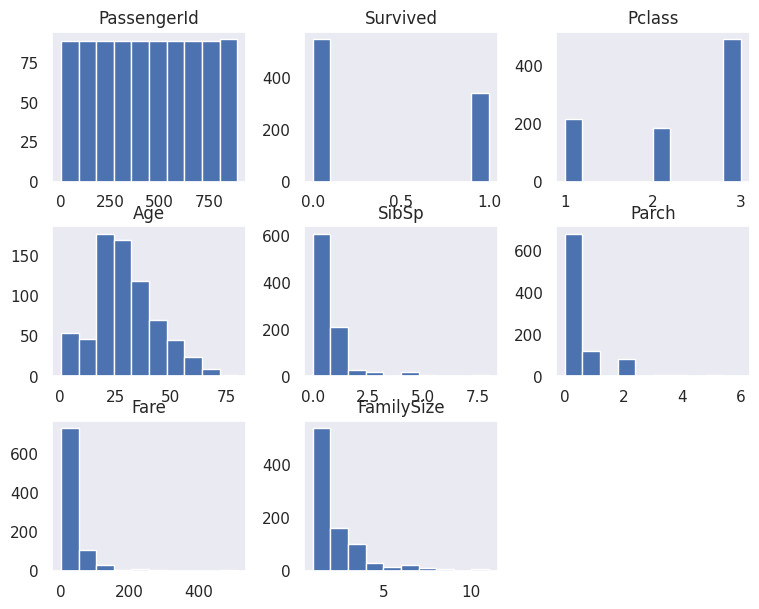

In [52]:
titanic_df.hist(bins=10,figsize=(9,7),grid=False);

<Axes: title={'center': 'Age'}, xlabel='Pclass'>

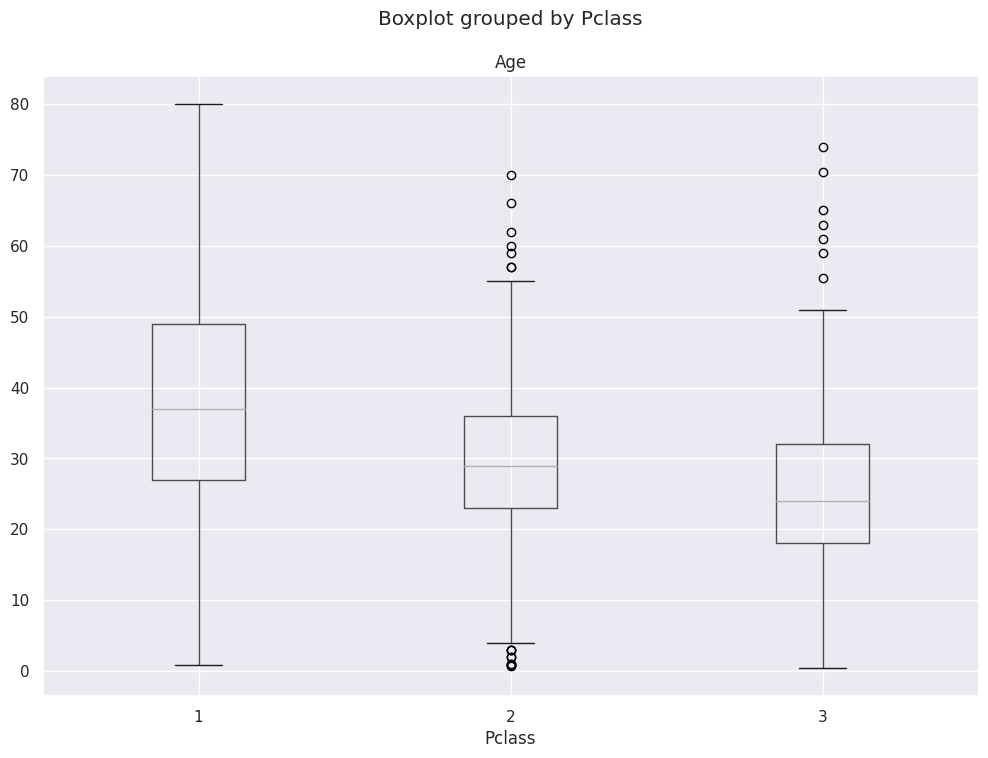

In [85]:
titanic_df.boxplot(column='Age', by='Pclass') #Poner el by POS nos va a dar una caja apra cada uno

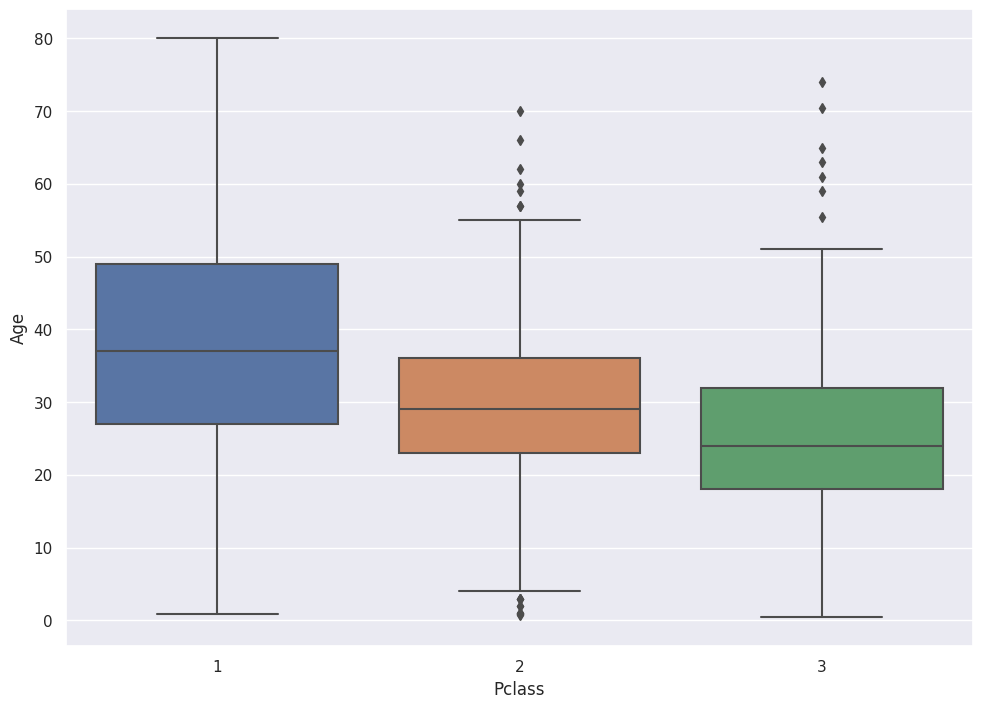

In [86]:
ax = sns.boxplot(x="Pclass", y="Age", 
                data=titanic_df)

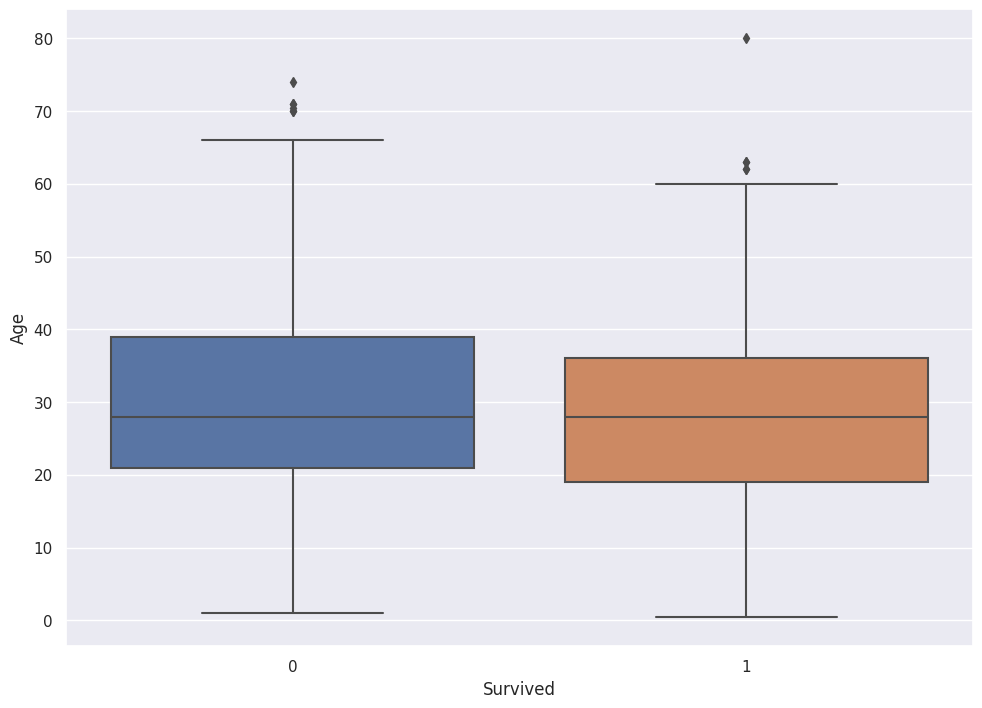

In [55]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=titanic_df)

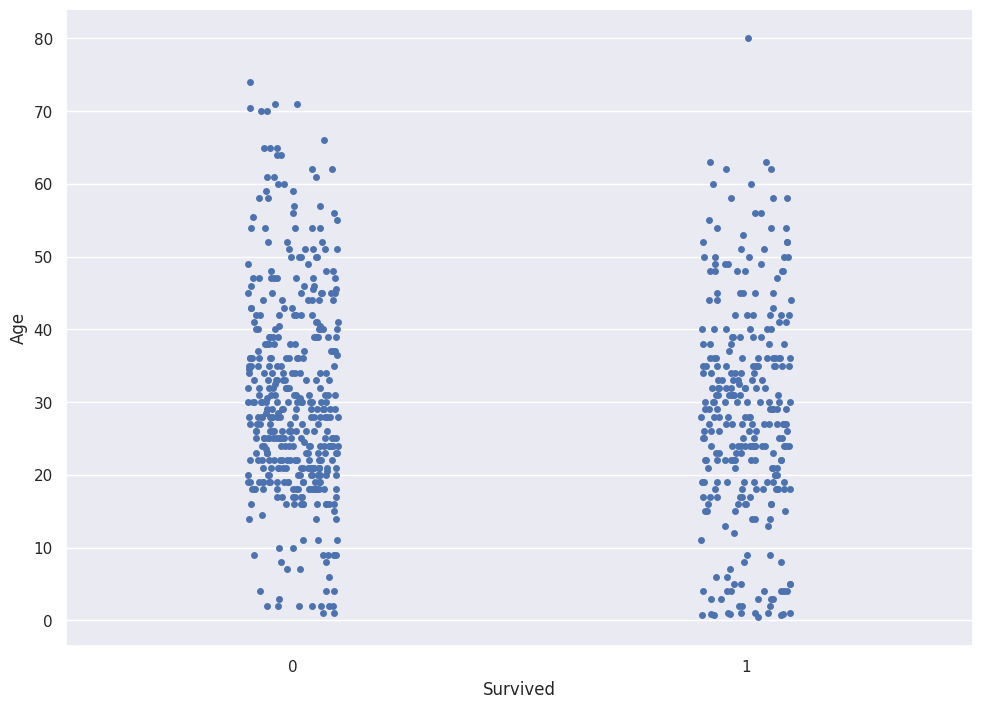

In [56]:
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic_df, jitter=True,
                   edgecolor="gray")

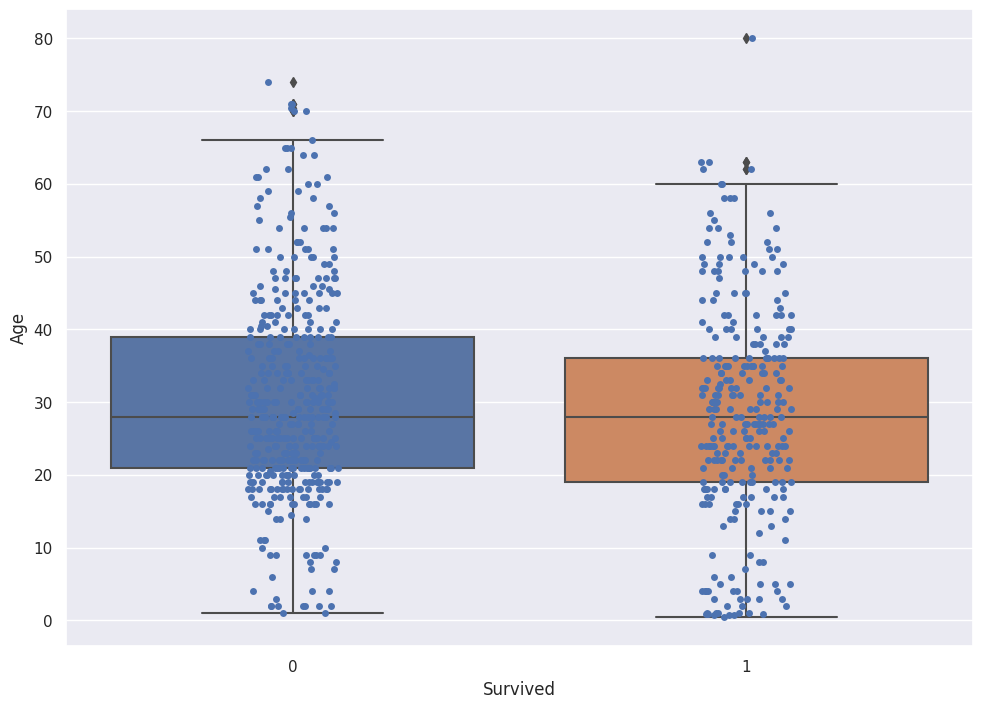

In [57]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=titanic_df)
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic_df, jitter=True,
                   edgecolor="gray")


La mayoría de los tripulantes entre 60 y 70 no sobrevivieron

In [87]:
titanic_df.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


In [58]:
correlation_matrix = titanic_df.corr().round(2)

<Axes: >

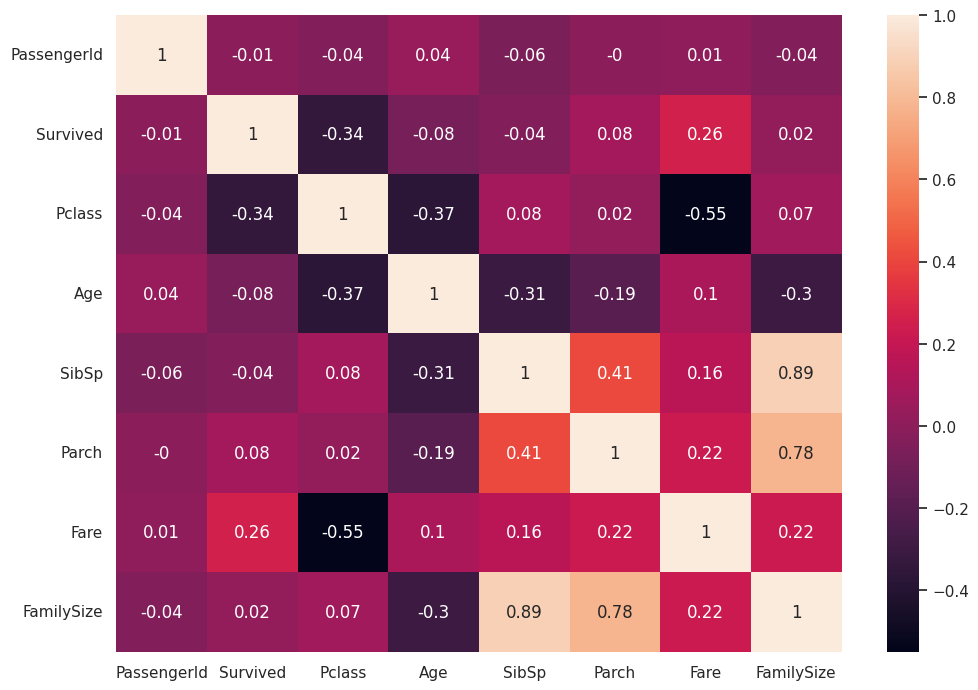

In [59]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Correlación negativa entre clase y tarifa, A mayor valor de clase (ej. 3a. clase), menor tarifa.  
Correlación negativa entre edad y clase, A mayor edad, menor valor de clase (1a. clase)  
Correlación positiva entre tarifa y sobrevivencia, A mayor tarifa, mayor sobrevivencia  

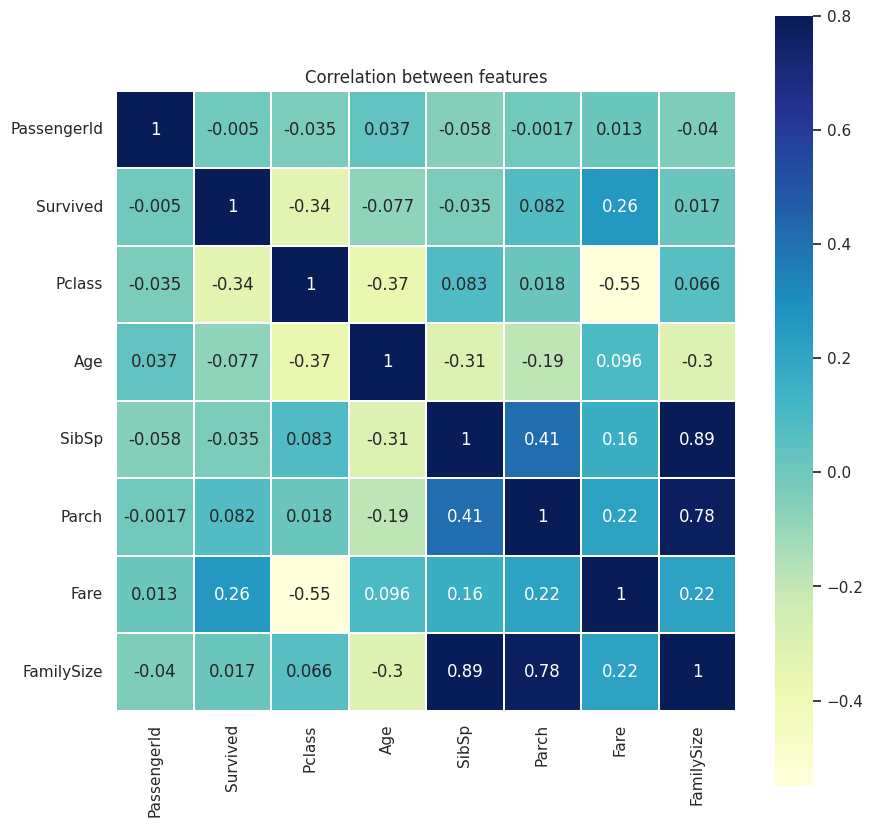

In [60]:
corr=titanic_df.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

Se aprecia que Pclass tiene la más alta correlación negativa con "Survived" 
Existe cierta correlación también con Fare, Parch y Age. 

## Consulta

Crea un subconjunto de **titanic** para el costo mayor a 250

In [72]:
# identifica los titanic con costo mayor a 250
titanic_df.Fare>250

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [73]:
# usa el criterio para extraer solo los boletos caros
tripulantes_tarifas_caras = titanic_df[titanic_df.Fare >= 250]
tripulantes_tarifas_caras

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,6
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,5
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,6
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,6
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,5


## Operaciones de ordenamiento

In [75]:
# ordenar por etiquetas de renglón
tripulantes_tarifas_caras.sort_values('Name')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,6
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,6
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,6
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,5
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,5
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1


In [77]:
# ordenar por valores de columna usando "order field"
tripulantes_tarifas_caras.sort_values('Age',ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,6
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,6
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,6
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,5
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,5


In [81]:
# top 5 de Edad
top10 = tripulantes_tarifas_caras.sort_values('Fare',ascending=False).head()
top10

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,6
